In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from collections import Counter 
import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



def null_cleaning(data,columns):
    for column in columns:
        data = data[data[column].notna()]
    return data

def value_cleaning(data, columns, value):
    for column in columns:
        data = data[data[column] > value];
    return data

def outlier_cleaning(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[~((data[column] < (Q1 - 1.5 * IQR)) |(data[column] > (Q3 + 1.5 * IQR)))]
    return data
        
def plot_most_popular(data, region):
    publisher = data.groupby("Publisher")[region].sum().reset_index()
    top_15 = publisher.nlargest(15,region)
    f = plt.figure(figsize= (50,10))
    #total sales
    sb.barplot(data=top_15, x="Publisher", y=region, palette="dark")
    game_sales_scatter = data.loc[data["Publisher"].isin(top_15['Publisher'])]
    print(game_sales_scatter.shape)
    game_sales_scatter = game_sales_scatter[game_sales_scatter[region] > 0]
    print(game_sales_scatter.shape)
    f = plt.figure(figsize= (50,10))
    sb.boxplot(data=game_sales_scatter, x="Publisher", y=region, palette="deep")



54
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: Publisher, Length: 581, dtype: int64


<AxesSubplot:>

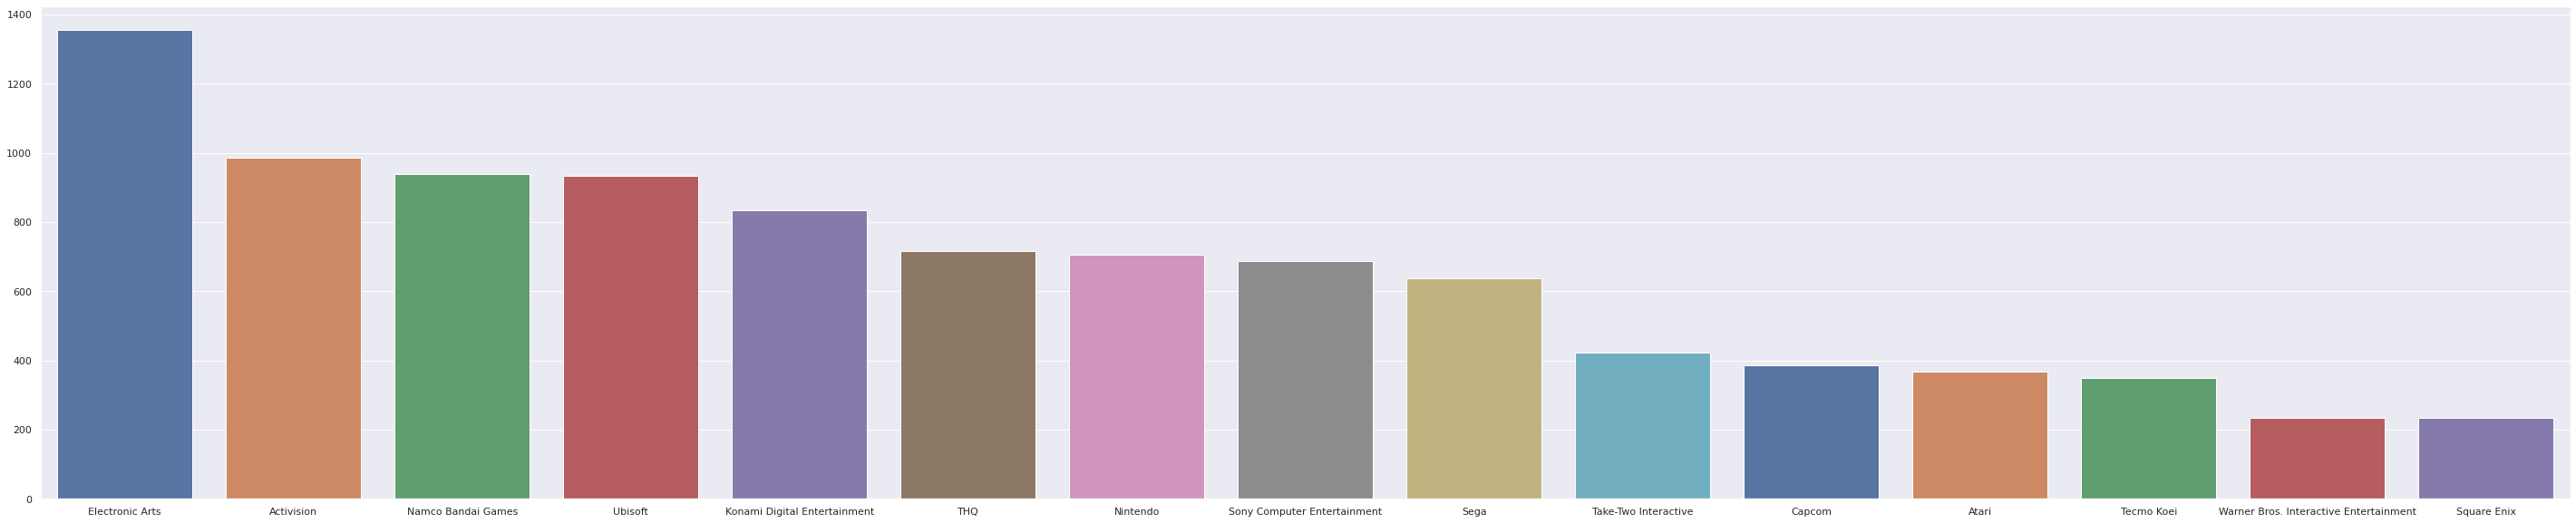

In [2]:
data = pd.read_csv('/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')
sales = ["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
#checking invalid data rows
print(data["Publisher"].isnull().sum());
print(data[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].isnull().sum())
#simple cleaning
cleaned_data = null_cleaning(data, ["Publisher"])
print(cleaned_data["Publisher"].value_counts())
#top 15 publishers with the most number of games
top_15 = Counter(cleaned_data['Publisher'].tolist()).most_common(15)
top_x, top_y = [x[0] for x in top_15], [x[1] for x in top_15]
f = plt.figure(figsize= (50,10))
sb.barplot(x=top_x,y=top_y, palette="deep")

(9612, 16)
(7617, 16)
(9443, 16)
(6854, 16)
(6758, 16)
(3765, 16)
(9479, 16)
(6730, 16)
(9628, 16)
(9628, 16)


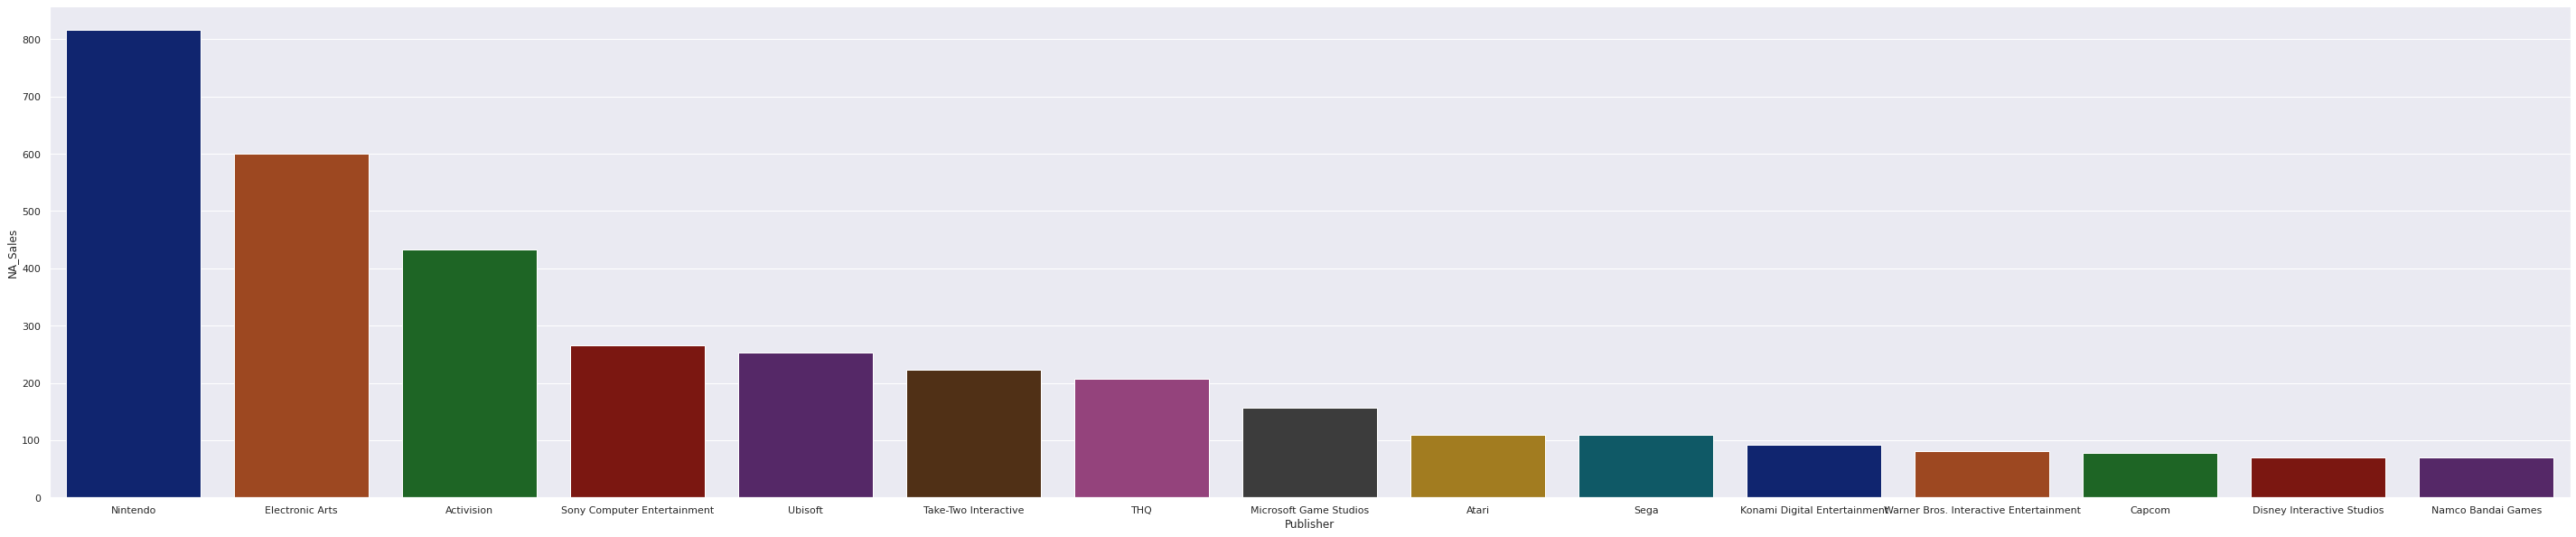

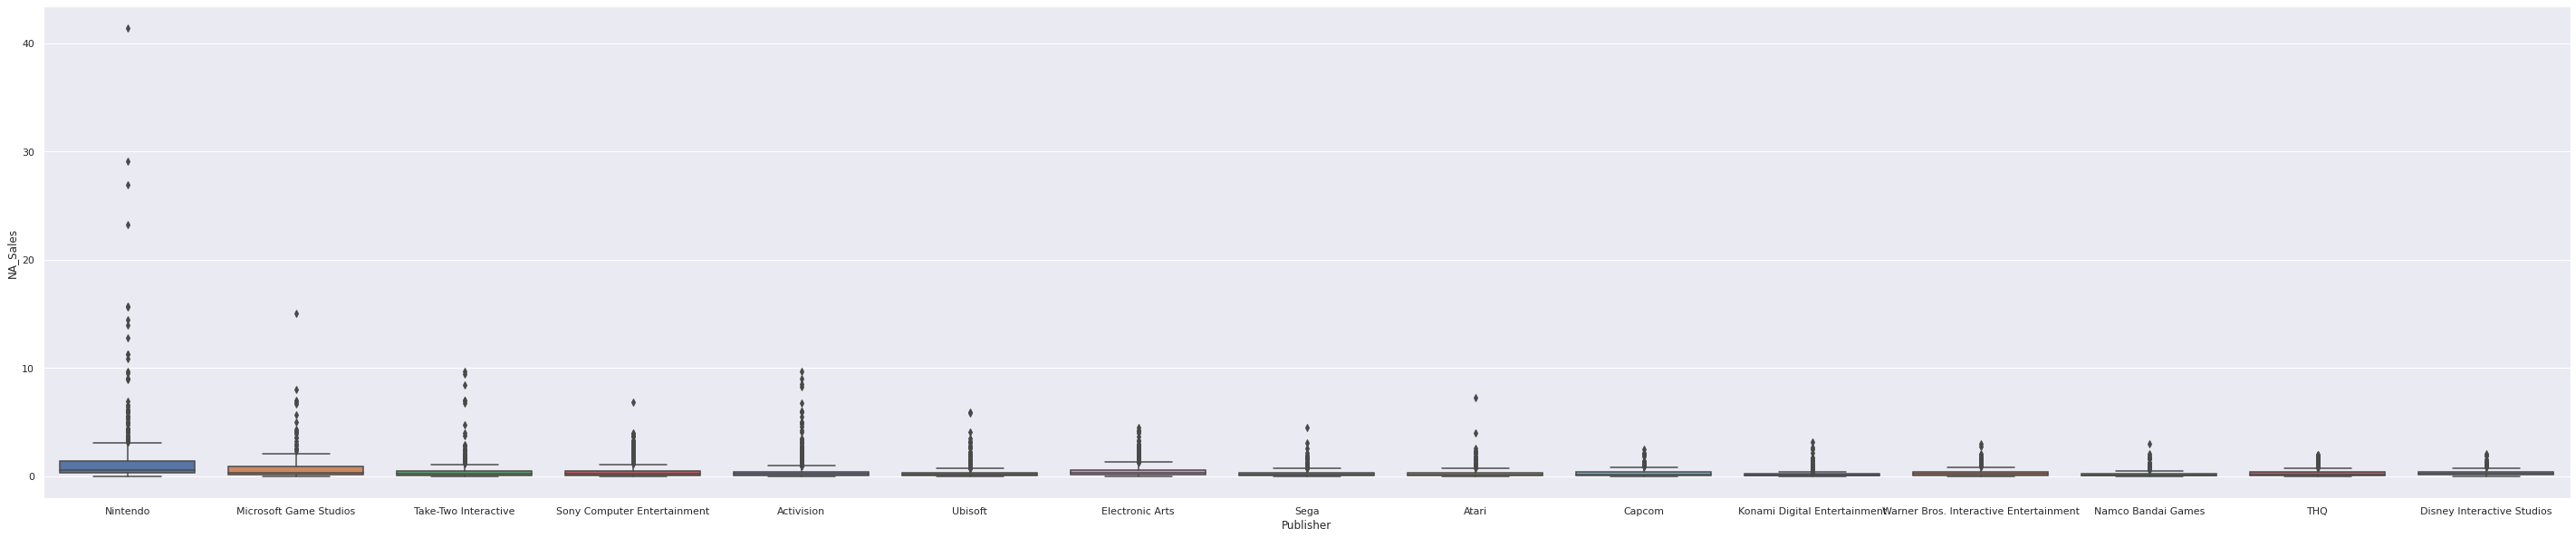

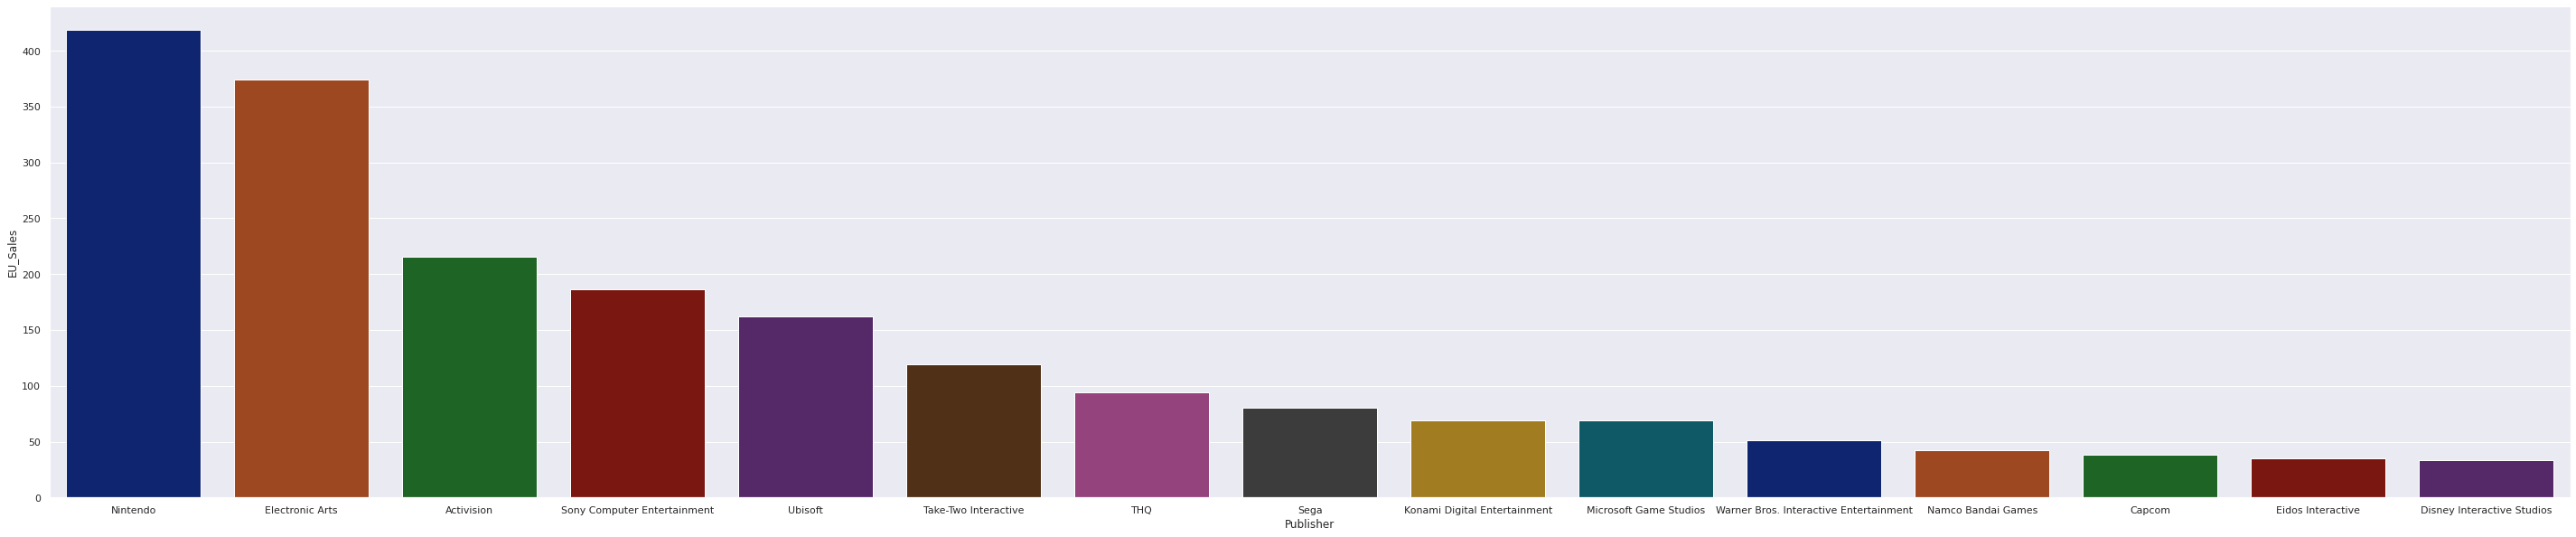

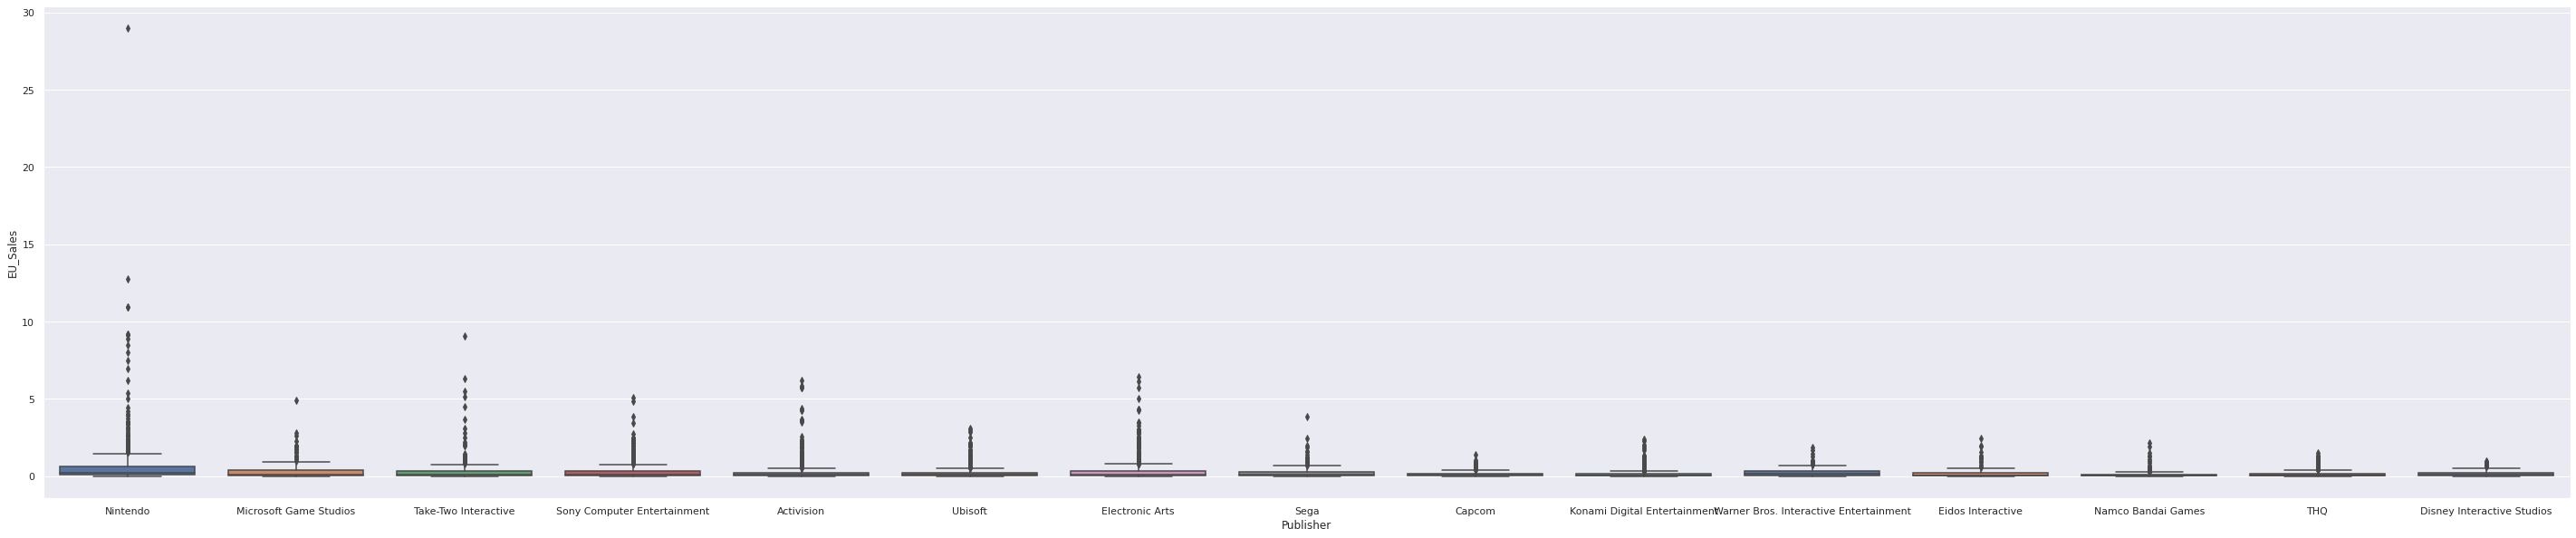

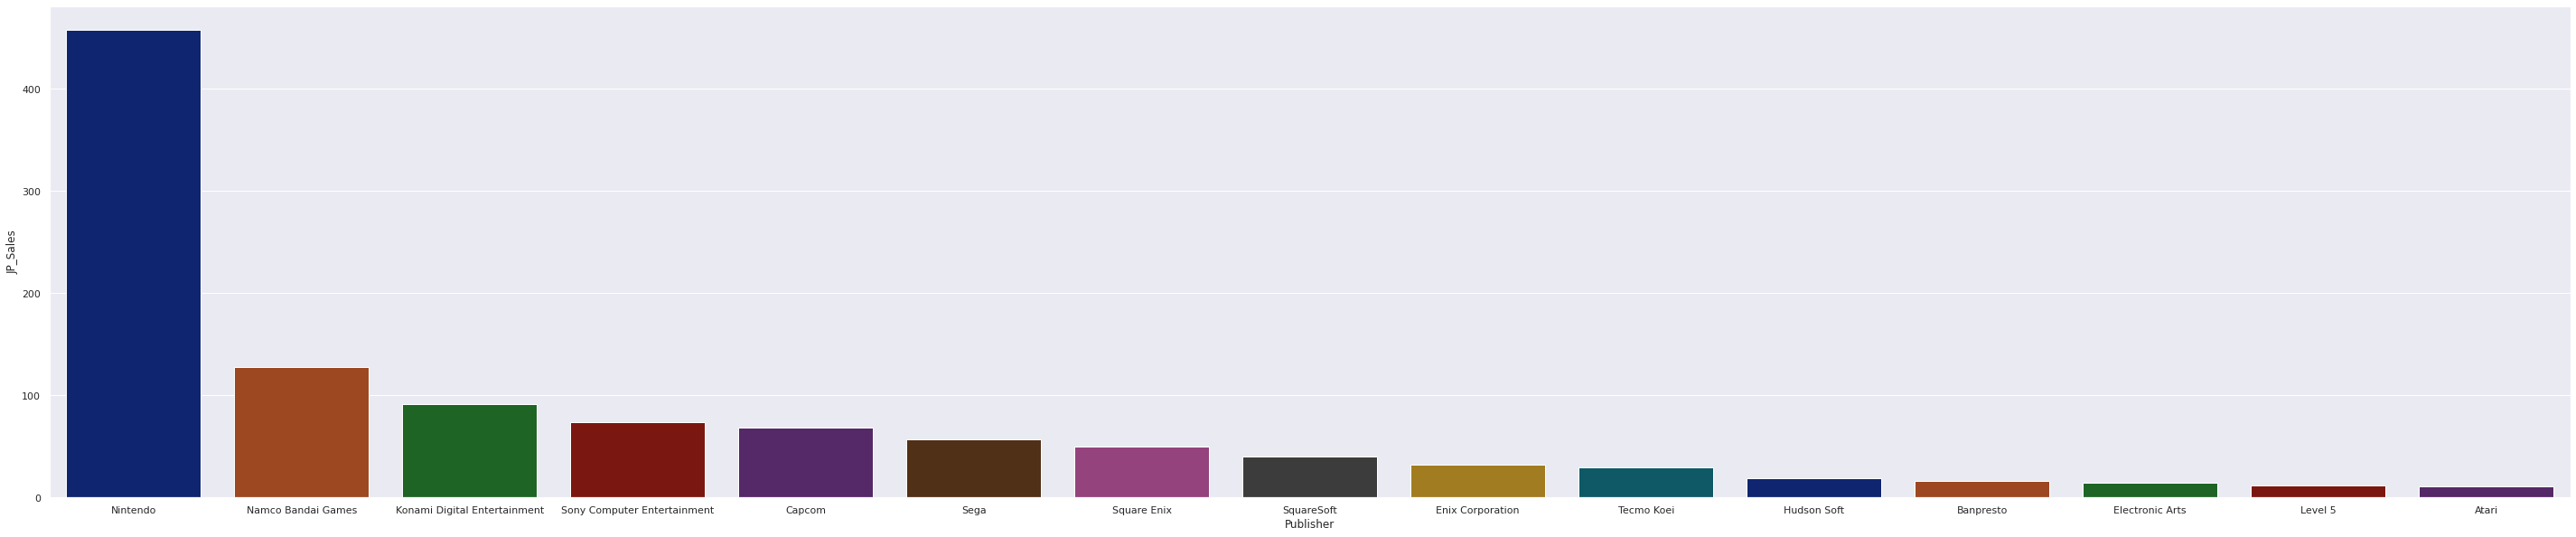

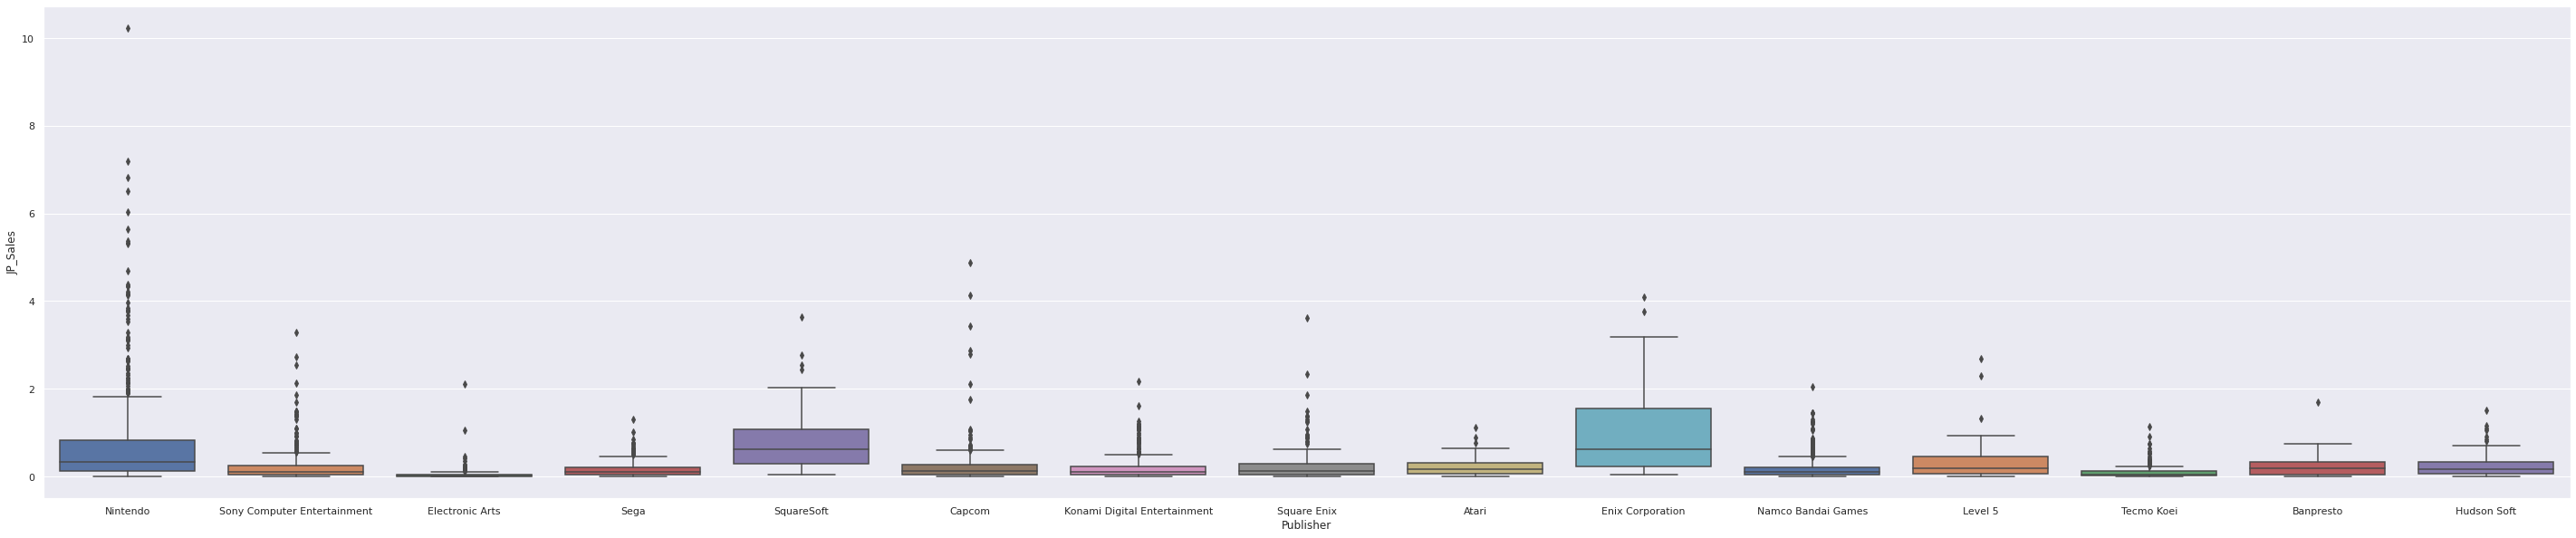

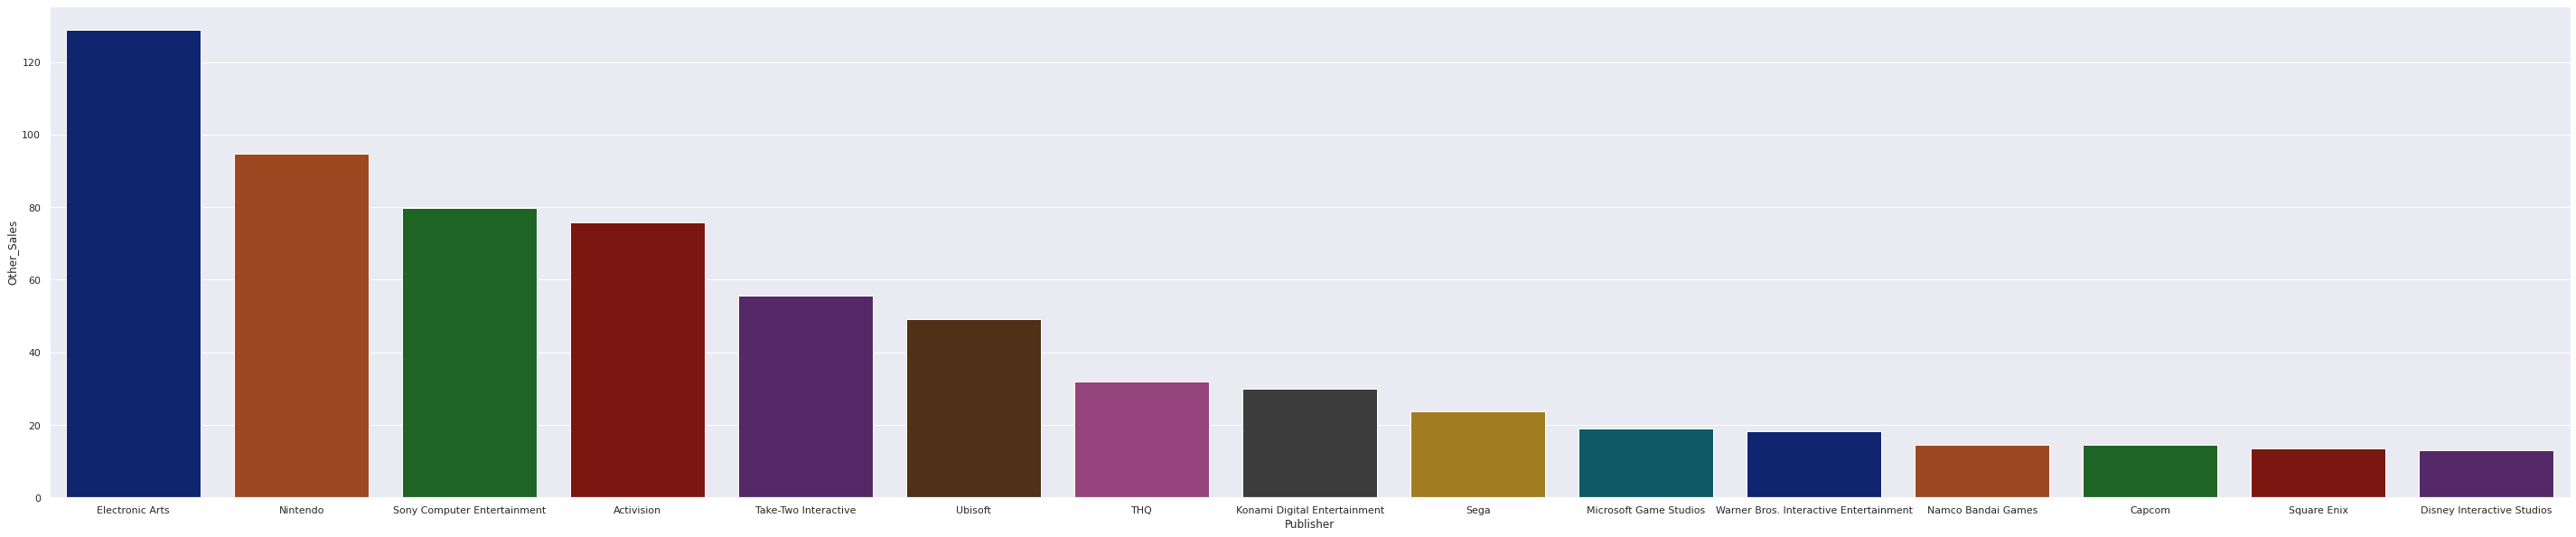

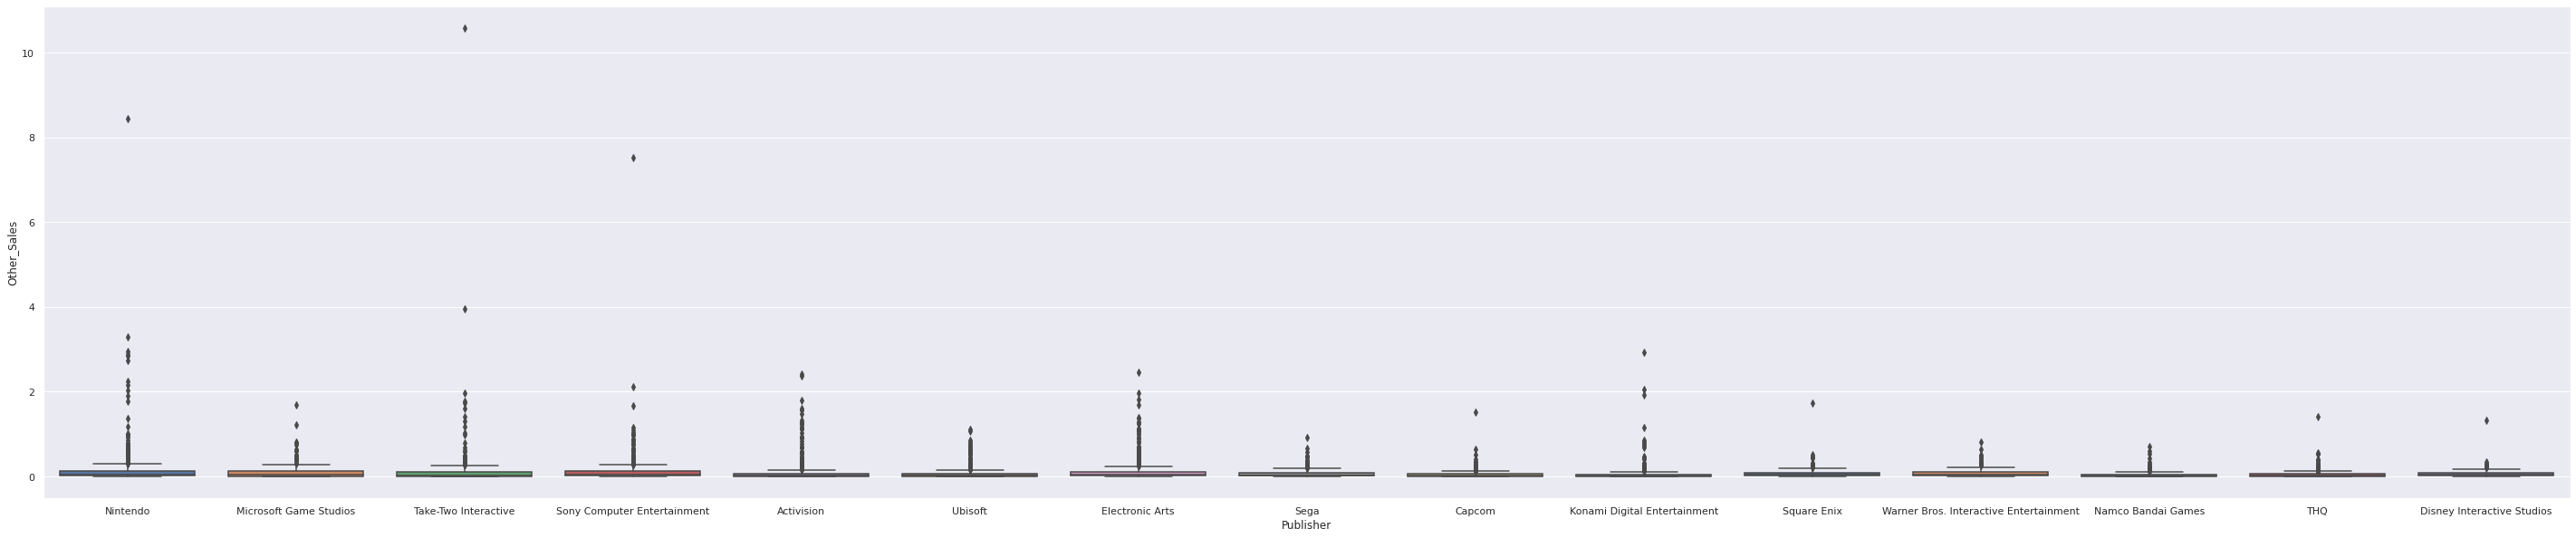

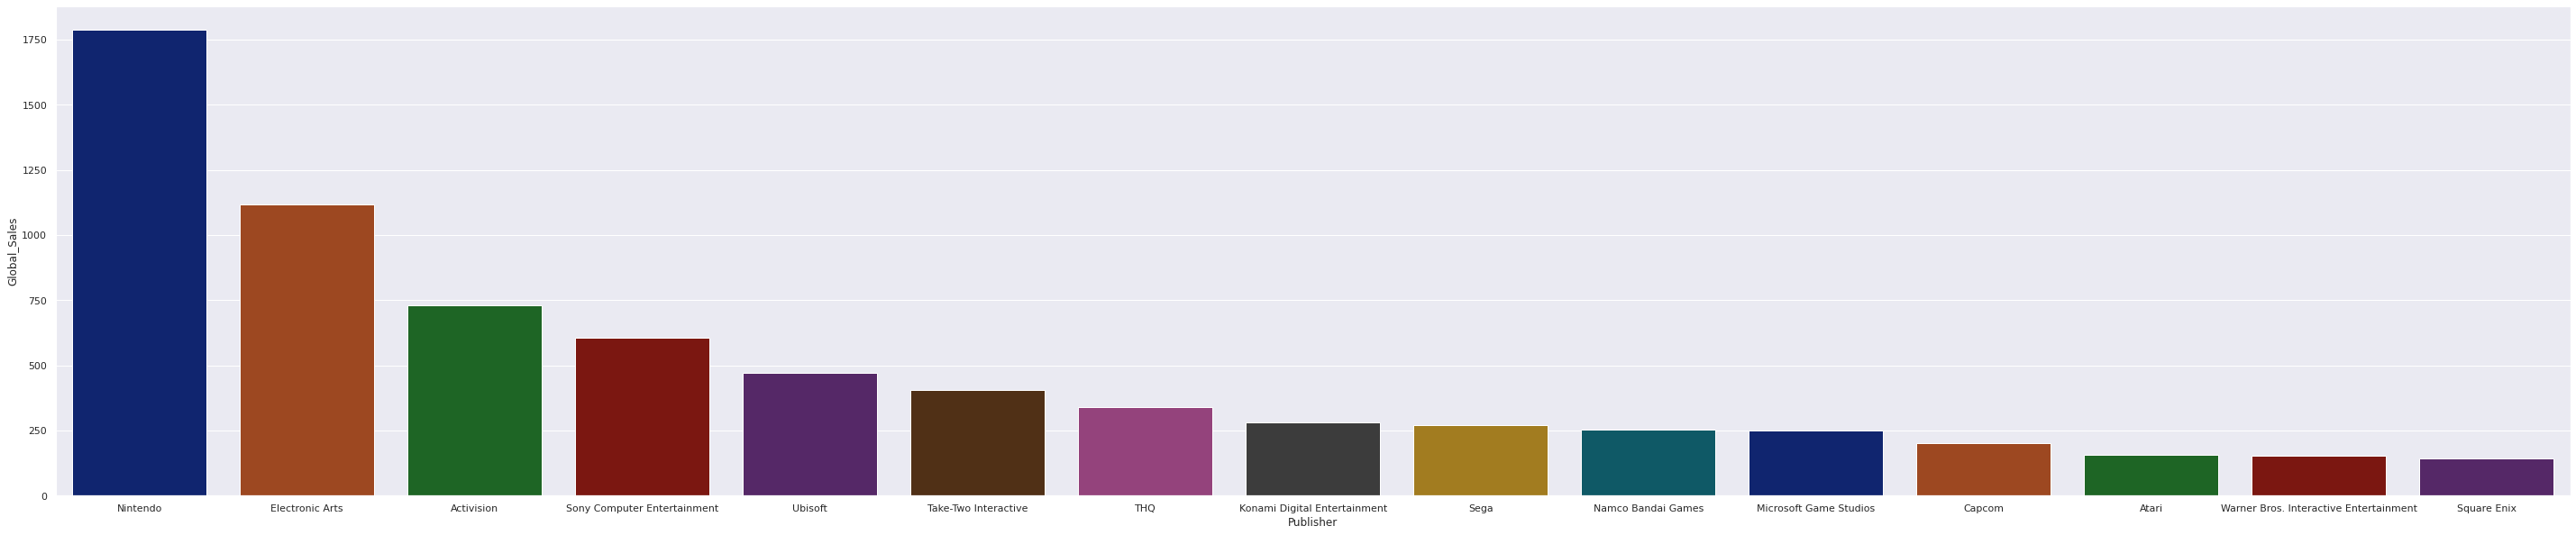

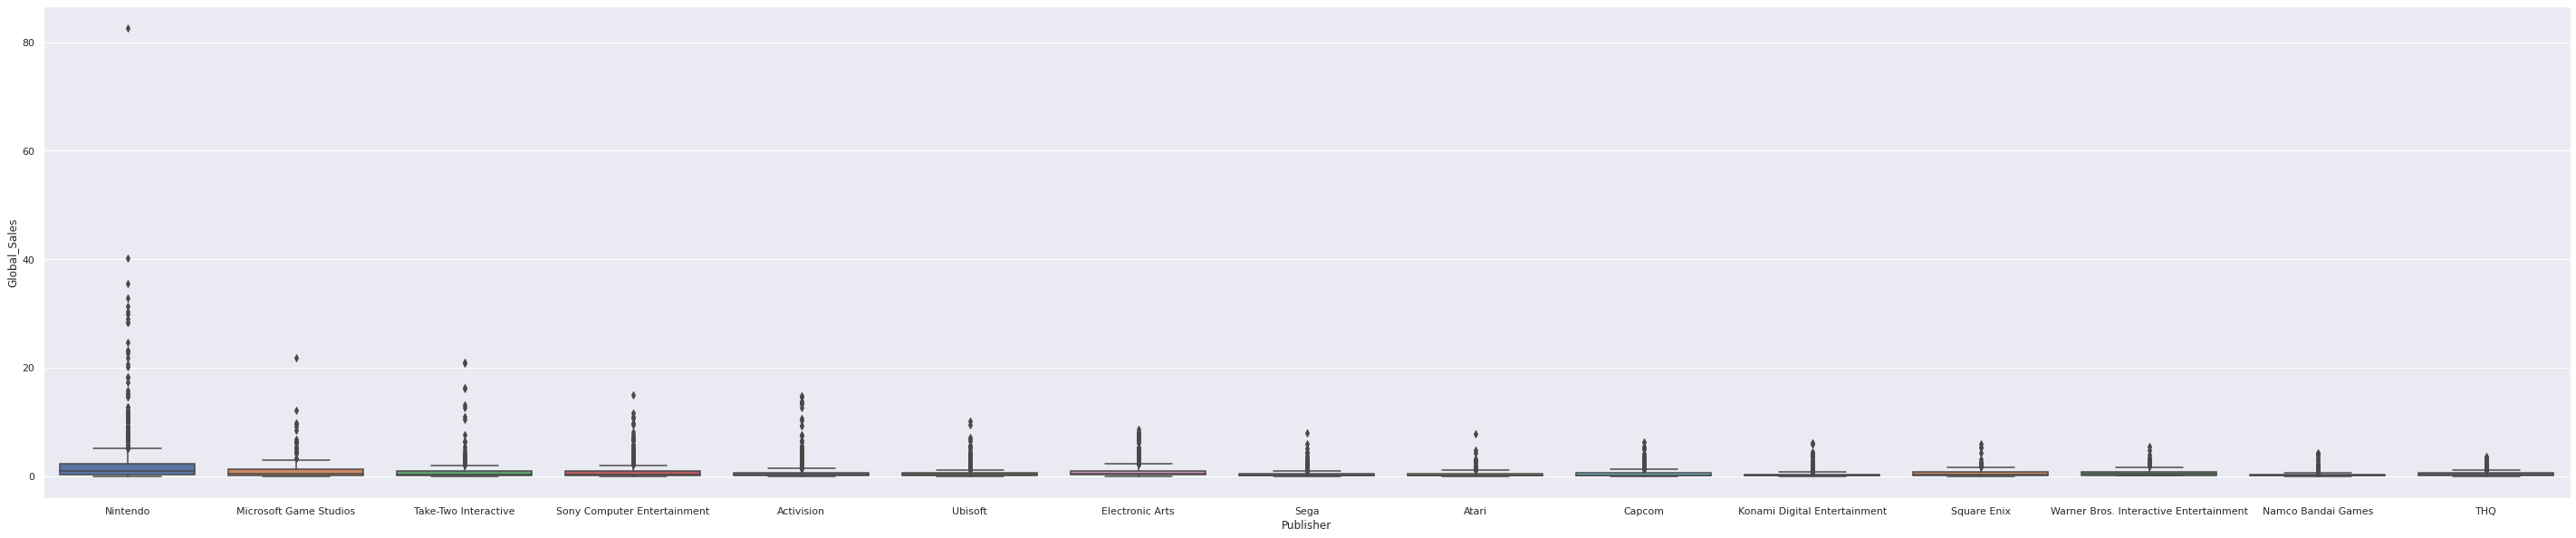

In [3]:
    
#NA sales
plot_most_popular(cleaned_data,"NA_Sales")
#EU Sales
plot_most_popular(cleaned_data,"EU_Sales")
#JP Sales
plot_most_popular(cleaned_data,"JP_Sales")
#Other Sales
plot_most_popular(cleaned_data,"Other_Sales")
#Global Sales
plot_most_popular(cleaned_data,"Global_Sales")        
#to be continued

<AxesSubplot:title={'center':'Other_Sales'}, ylabel='Platform'>

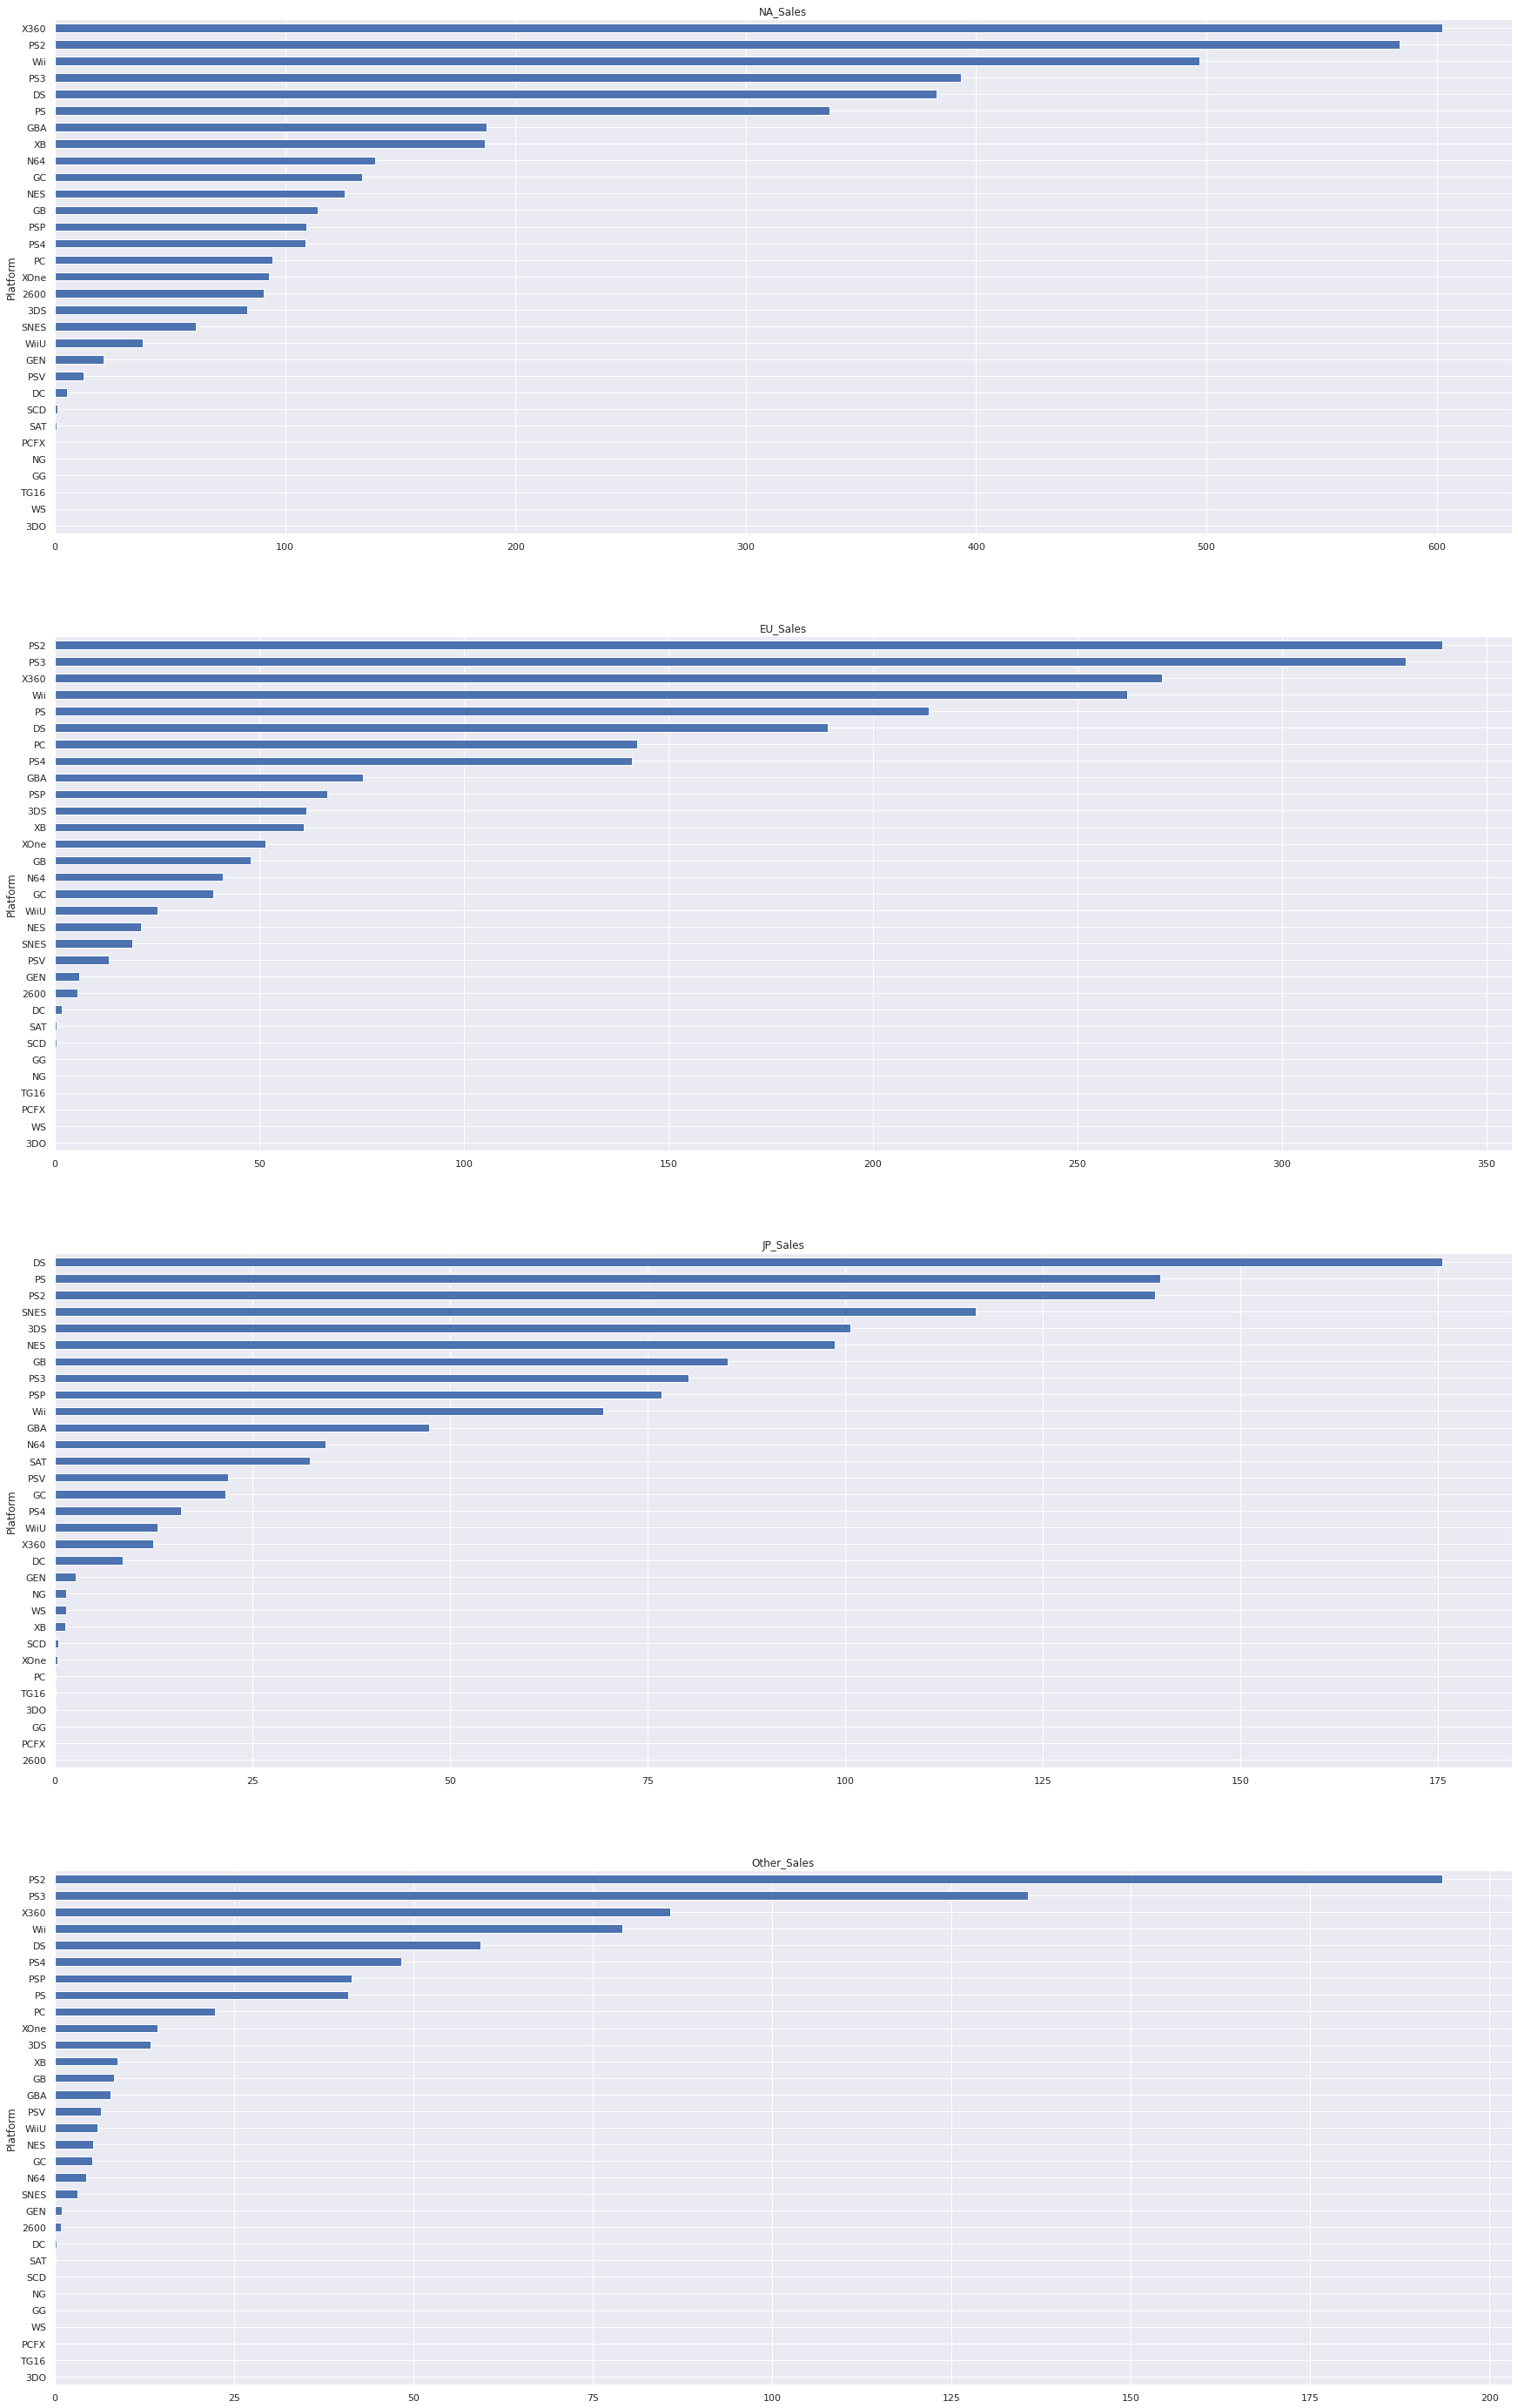

In [4]:
f, axes = plt.subplots(4, 1, figsize=(30, 50))
data.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='NA_Sales', ax = axes[0])
data.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='EU_Sales', ax = axes[1])
data.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='JP_Sales', ax = axes[2])
data.groupby('Platform')['Other_Sales'].sum().sort_values(ascending=True).plot(kind='barh', title='Other_Sales', ax = axes[3])

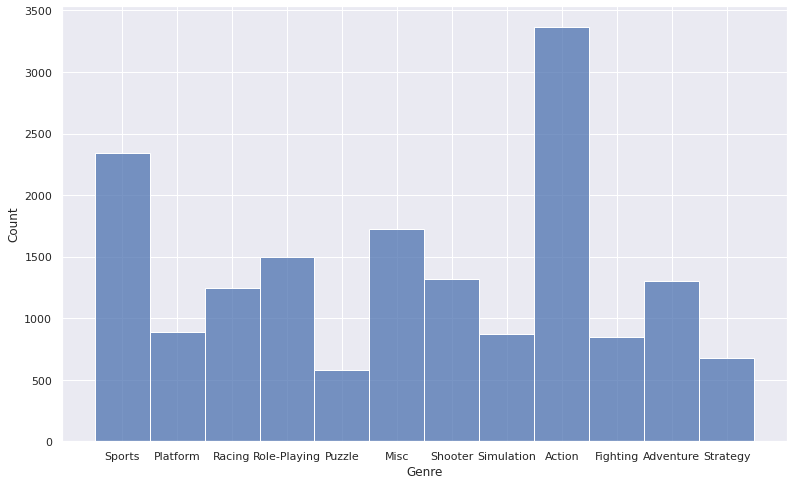

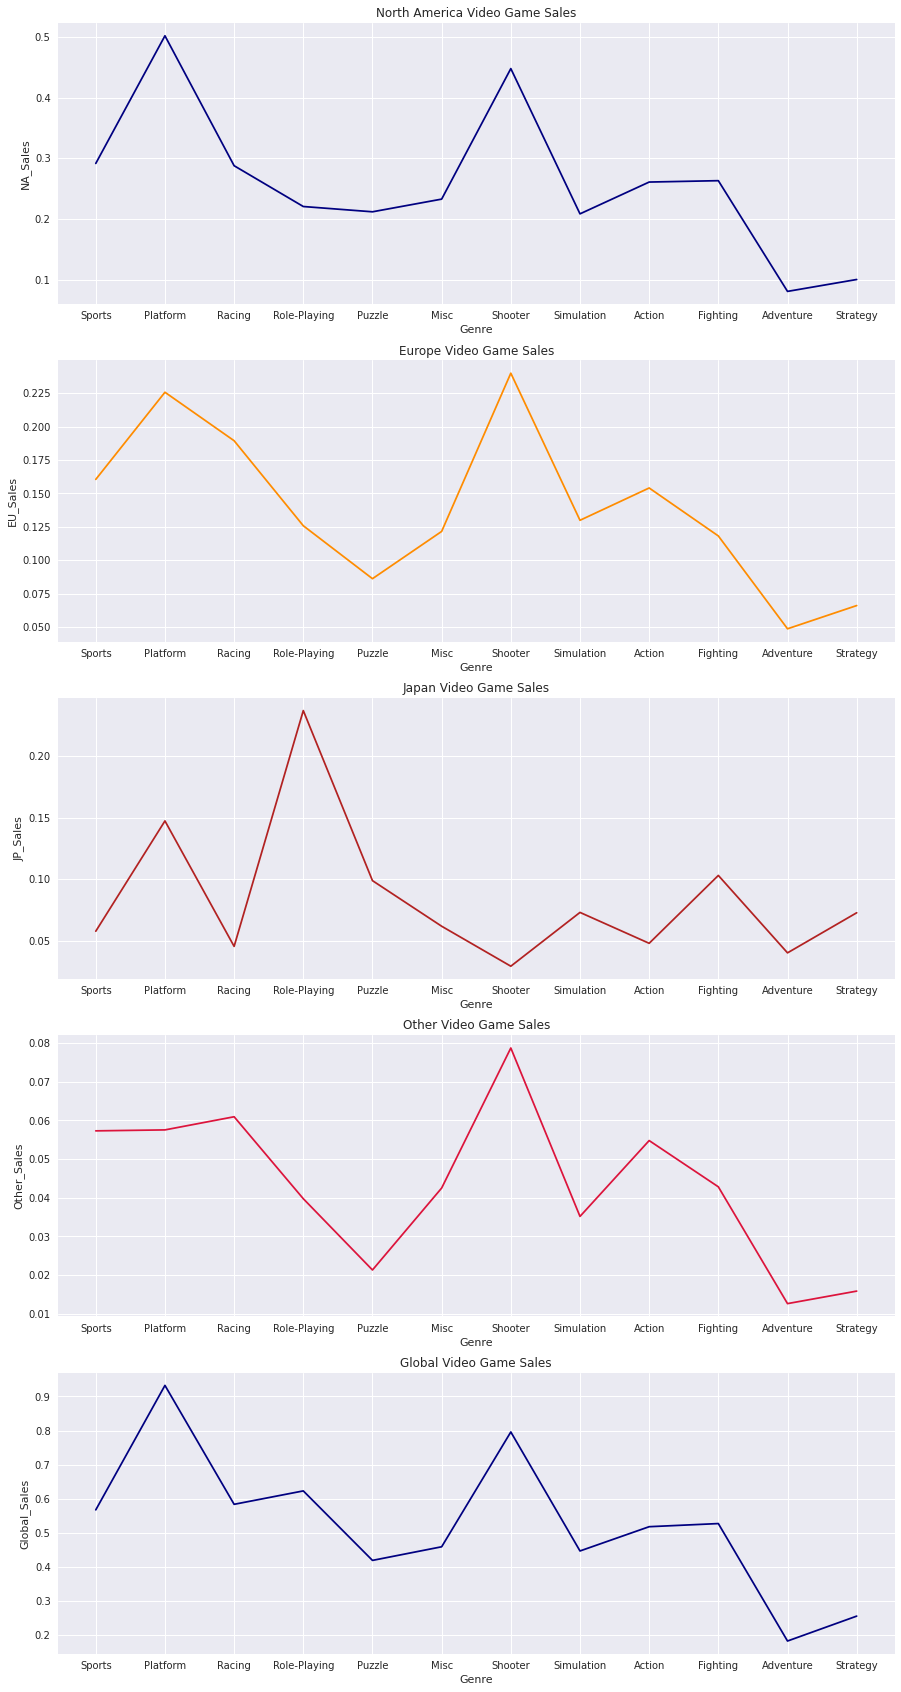

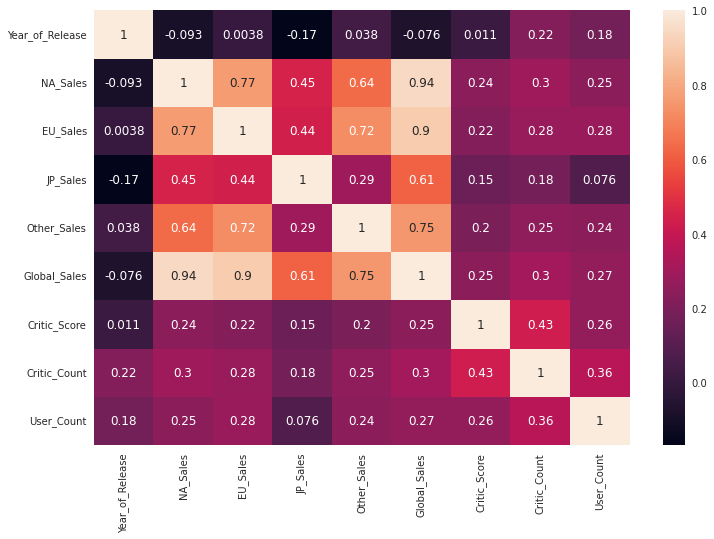

In [5]:

cleanedData = null_cleaning(data, ['Genre', 'Publisher'])
cleanedGenre = cleanedData['Genre'] 

fig, ax = plt.subplots(1,1, figsize=(13,8))
sb.histplot(data = cleanedGenre)

plt.style.use("seaborn")
fig, ax =plt.subplots(5,1, figsize=(15,30)) 

sb.lineplot(data=data, x = 'Genre', y = "NA_Sales", ci=None, ax=ax[0], color="navy")
ax[0].set_title("North America Video Game Sales")

sb.lineplot(data=data, x = 'Genre', y = "EU_Sales", ci=None, ax=ax[1], color="darkorange")
ax[1].set_title("Europe Video Game Sales")

sb.lineplot(data=data, x = 'Genre', y = "JP_Sales", ci=None, ax=ax[2], color="firebrick")
ax[2].set_title("Japan Video Game Sales")

sb.lineplot(data=data, x = 'Genre', y = "Other_Sales", ci=None, ax=ax[3], color="crimson")
ax[3].set_title("Other Video Game Sales")

sb.lineplot(data=data, x = 'Genre', y = "Global_Sales", ci=None, ax=ax[4], color="navy")
ax[4].set_title("Global Video Game Sales")

plt.figure(figsize=(12, 8))
data_corr = data.corr()
sb.heatmap(data_corr, 
            xticklabels = data_corr.columns.values,
            yticklabels = data_corr.columns.values,
            annot = True);

In [6]:
#cleaning data for ratings

#view the set of data first

ratings = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count']

for column in ratings:
    print(data[column].value_counts())
    
cleaned_data = null_cleaning(data, ratings)
cleaned_data = value_cleaning(cleaned_data, ['Critic_Count'], 10)
print(cleaned_data.describe())
cleaned_data = outlier_cleaning(cleaned_data, ["NA_Sales"])
print(cleaned_data.describe())

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: Critic_Score, Length: 82, dtype: int64
4.0      307
5.0      273
11.0     248
9.0      248
7.0      243
        ... 
103.0      1
102.0      1
106.0      1
3.0        1
104.0      1
Name: Critic_Count, Length: 106, dtype: int64
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64
4.0       344
6.0       341
5.0       335
8.0       283
7.0       269
         ... 
443.0       1
1571.0      1
953.0       1
1287.0      1
412.0       1
Name: User_Count, Length: 888, dtype: int64
       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      5791.000000  5891.000000  5891.000000  5891.000000  5891.000000   
mean       2007.457261     0.428715     0.259869     0.071283     0.089184   
std           4.164020     